Khởi dạo load file csv từ hdfs

In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import pyarrow as pa
hdfs_config = {
     "host" : "192.168.1.22",
     "port" : 9000,
     "user" : "user"
}
fs = pa.hdfs.connect(hdfs_config['host'], hdfs_config['port'], 
user=hdfs_config['user'])
df=pd.read_csv(fs.open("/group32/data.csv"))
df.head()
print(df.head())

   Unnamed: 0                                 Tên        Giá  Năm sản xuất  \
0           0             Mazda 3 1.5L Sedan 2020  595000000          2020   
1           1     Mitsubishi Xpander 1.5 AT  2020  595000000          2020   
2           2   Mitsubishi Outlander 2.0 CVT 2019  696000000          2019   
3           3  Hyundai Kona 2.0AT Tiêu chuẩn 2021  615000000          2021   
4           4              Toyota Camry 2.0E 2015  620000000          2015   

  Kiểu dáng Tình trạng      Xuất xứ  Số km đã đi  Tỉnh thành   Quận huyện  \
0     Sedan      Xe cũ   Trong nước        32000      Hà Nội     Cầu Giấy   
1       MPV      Xe cũ   Trong nước        20000  Bình Dương     Thuận An   
2       SUV      Xe cũ   Trong nước        67000      Tp.HCM      Thủ Đức   
3       SUV      Xe cũ   Trong nước        16000      Hà Nội   Thanh Xuân   
4     Sedan      Xe cũ   Trong nước       100000      Hà Nội  Nam Từ Liêm   

        Hộp số Nhiên liệu  
0   Số tự động       Xăng  
1   Số tự độ

Biểu đồ về khoảng giá của các xe 

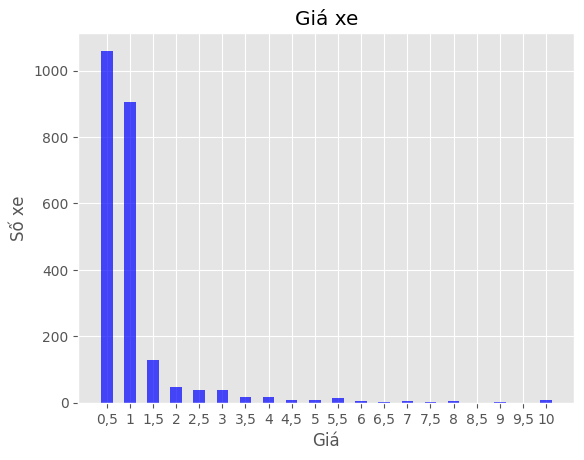

In [4]:
df=pd.read_csv(fs.open("/group32/data.csv"))

duoi500tr =len(df[df["Giá"]<= 500000000]) 
duoi1ty =len(df[(df["Giá"] > 500000000) & (df["Giá"]<= 1000000000)]) 
duoi1ty5 = len(df[(df["Giá"]> 1000000000) & (df["Giá"]<= 1500000000)])
duoi2ty = len(df[(df["Giá"] > 1500000000) & (df["Giá"]<= 2000000000)])
duoi2ty5 = len(df[(df["Giá"]> 2000000000) & (df["Giá"]<= 2500000000)])
duoi3ty = len(df[(df["Giá"] > 2500000000) & (df["Giá"]<= 3000000000)])
duoi3ty5 = len(df[(df["Giá"]> 3000000000) & (df["Giá"]<=3500000000)])
duoi4ty = len(df[(df["Giá"] > 3500000000) & (df["Giá"]<= 4000000000)])
duoi4ty5 = len(df[(df["Giá"]> 4000000000) & (df["Giá"]<=4500000000)])
duoi5ty = len(df[(df["Giá"] > 4500000000) & (df["Giá"]<= 5000000000)])
duoi5ty5 = len(df[(df["Giá"]> 5000000000) & (df["Giá"]<=5500000000)])
duoi6ty = len(df[(df["Giá"] > 5500000000) & (df["Giá"]<= 6000000000)])
duoi6ty5 = len(df[(df["Giá"]> 6000000000) & (df["Giá"]<=6500000000)])
duoi7ty = len(df[(df["Giá"] > 6500000000) & (df["Giá"]<= 7000000000)])
duoi7ty5 = len(df[(df["Giá"]> 7000000000) & (df["Giá"]<=7500000000)])
duoi8ty = len(df[(df["Giá"] > 7500000000) & (df["Giá"]<= 8000000000)])
duoi8ty5 = len(df[(df["Giá"]> 8000000000) & (df["Giá"]<=8500000000)])
duoi9ty = len(df[(df["Giá"] > 8500000000) & (df["Giá"]<= 9000000000)])
duoi9ty5 = len(df[(df["Giá"]> 9000000000) & (df["Giá"]<=9500000000)])
tren9ty5 =  len(df[df["Giá"]>= 9500000000])
gia = np.array([duoi500tr, duoi1ty,duoi1ty5, duoi2ty, duoi2ty5, duoi3ty, duoi3ty5,duoi4ty, duoi4ty5,duoi5ty,duoi5ty5,duoi6ty,duoi6ty5,duoi7ty,duoi7ty5,duoi8ty,duoi8ty5,duoi9ty,duoi9ty5,tren9ty5])
khoanggia=[ "0,5", "1", "1,5", "2", "2,5", "3", "3,5", "4", "4,5", "5", "5,5", "6", "6,5", "7", "7,5", "8", "8,5", "9", "9,5", "10"]

plt.bar(khoanggia, gia, color = 'blue', width = 0.5, alpha = 0.7)

plt.title('Giá xe')
plt.xlabel('Giá')
plt.ylabel('Số xe')
plt.show()


Biểu đồ về lượng xe theo năm sản xuất

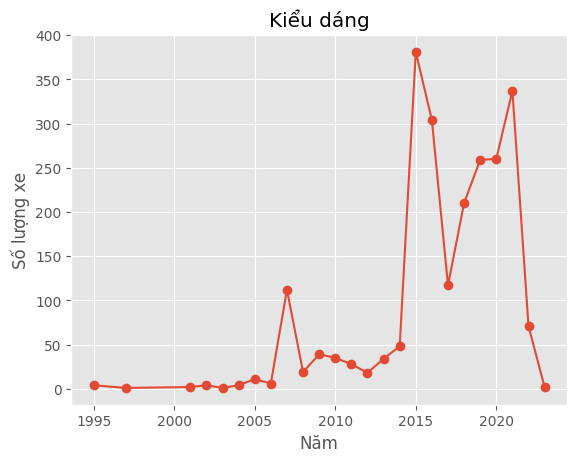

In [5]:
sort = df.sort_values('Năm sản xuất')
plt.title('Năm sản xuất')
plt.xlabel('Năm')
plt.ylabel('Số lượng xe')
do = sort['Năm sản xuất'].value_counts().sort_index()
do.plot( marker = 'o')
plt.show()

Biểu đồ về kiểu dáng

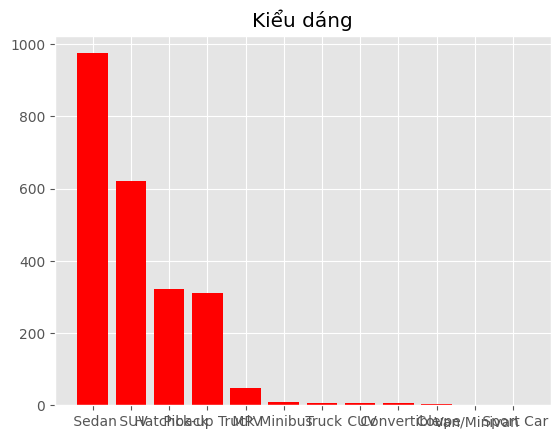

In [6]:
do = df['Kiểu dáng'].value_counts()
fig = plt.figure()
plt.title('Kiểu dáng')
plt.bar(do.index, do.values,color='red')
plt.show()

Biểu đồ tròn biểu thị nhiên liệu

 Xăng      1884
 Diesel     408
 Hybrid      12
 Điện         3
Name: Nhiên liệu, dtype: int64


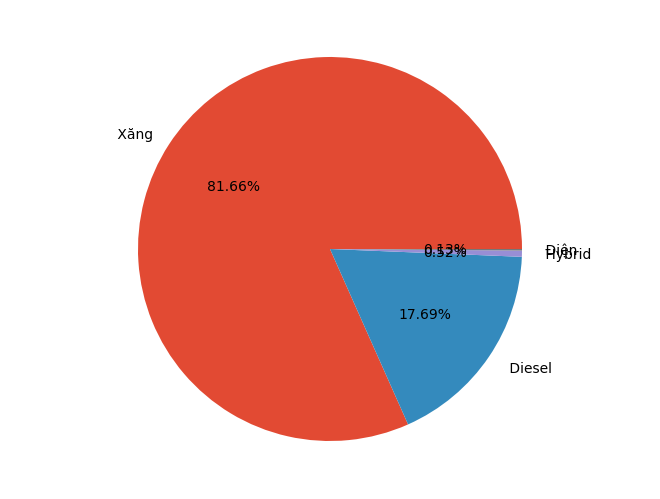

In [7]:
do = df['Nhiên liệu'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
print(do)
ax.pie(do.values, labels = do.index,autopct='%1.2f%%')

plt.show()

In [ ]:
sort = df.sort_values('Số km đã đi')
plt.title('Km đã đi')
plt.xlabel('Năm')
plt.ylabel('Số lượng xe')
do = sort['Số km đã đi'].value_counts().sort_index()

Biểu đồ xuất xứ

 Trong nước    1353
 Nhập khẩu      954
Name: Xuất xứ, dtype: int64


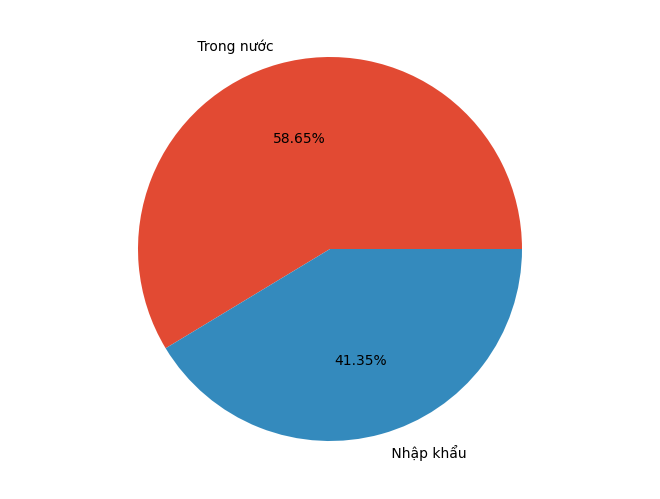

In [10]:
do = df['Xuất xứ'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
print(do)
ax.pie(do.values, labels = do.index,autopct='%1.2f%%')
plt.show()

Biểu đồ về 5 tỉnh có lượng xe nhiều nhất

([<matplotlib.patches.Wedge at 0x1cce67a0940>,
 [Text(-0.4523909109729269, 1.0026676735933424, 'Hà Nội'),
  Text(-0.1588722646708177, -1.0884666294923175, 'Tp.HCM'),
  Text(0.6707196606384571, -0.8718572915523692, 'Bình Dương'),
  Text(0.9578977661688164, -0.540769701045456, 'Hải Dương'),
  Text(1.0845764856793418, -0.18355883719246135, 'Đà Nẵng')],
 [Text(-0.24675867871250554, 0.5469096401418231, '63.49%'),
  Text(-0.0866575989113551, -0.5937090706321732, '18.40%'),
  Text(0.36584708762097656, -0.4755585226649286, '7.08%'),
  Text(0.5224896906375361, -0.2949652914793396, '5.69%'),
  Text(0.5915871740069137, -0.1001230021049789, '5.34%')])

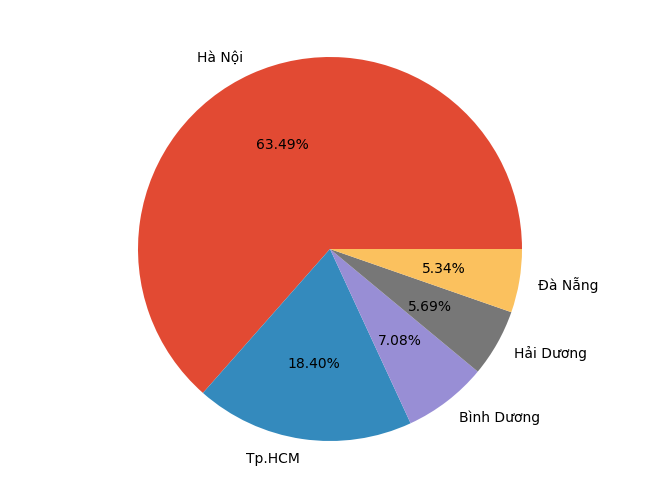

In [14]:
do = df['Tỉnh thành'].value_counts()
da = do.head()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(da.values, labels = da.index,autopct='%1.2f%%')
